# NOVEL CORONA VIRUS PREDICTION FOR STATE

In [1]:
import pandas as pd
import numpy as np
import pickle


### Loading the dataset
df = pd.read_csv('Dataset\Statewise_Dataset.csv')

In [2]:
df.head()

,Day,Month,Year,Detected State,Current Status,Num Cases
0,1,1,2021,Andaman and Nicobar Islands,Active,1
1,1,1,2021,Andaman and Nicobar Islands,Recovered,4
2,1,1,2021,Andhra Pradesh,Active,326
3,1,1,2021,Andhra Pradesh,Recovered,350
4,1,1,2021,Arunachal Pradesh,Recovered,2


In [3]:
# Return size of dataset
df.shape

(32166, 6)

In [4]:
# Return different datatypes for each columns(float, int, string, bool, etc.)
df.dtypes

Day                int64
Month              int64
Year               int64
Detected State    object
Current Status    object
Num Cases          int64
dtype: object

In [5]:
# Return basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Day             32166 non-null  int64 
 1   Month           32166 non-null  int64 
 2   Year            32166 non-null  int64 
 3   Detected State  32166 non-null  object
 4   Current Status  32166 non-null  object
 5   Num Cases       32166 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.5+ MB


In [6]:
df.isnull().sum()

Day               0
Month             0
Year              0
Detected State    0
Current Status    0
Num Cases         0
dtype: int64

In [7]:
df['Detected State'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'Dadra and Nagar Haveli and Daman and Diu', 'Lakshadweep',
       'Meghalaya', 'State Unassigned'], dtype=object)

In [8]:
df['Current Status'].unique()

array(['Active', 'Recovered', 'Deceased', 'Migrated_Other',
       'Migrated_other', 'Migrated'], dtype=object)

In [9]:
# Keeping only consistent state
consistent_state = ['Kerala', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir',
                    'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'West Bengal', 'Chandigarh',
                    'Chhattisgarh', 'Gujarat', 'Madhya Pradesh', 'Bihar', 'Mizoram', 'Goa', 'Andaman and Nicobar Islands', 'Jharkhand']

In [10]:
df = df[(df['Detected State'].isin(consistent_state))]

In [11]:
df.head(30)

,Day,Month,Year,Detected State,Current Status,Num Cases
0,1,1,2021,Andaman and Nicobar Islands,Active,1
1,1,1,2021,Andaman and Nicobar Islands,Recovered,4
2,1,1,2021,Andhra Pradesh,Active,326
3,1,1,2021,Andhra Pradesh,Recovered,350
9,1,1,2021,Bihar,Deceased,3
10,1,1,2021,Bihar,Active,463
11,1,1,2021,Bihar,Recovered,404
12,1,1,2021,Chandigarh,Deceased,1
13,1,1,2021,Chandigarh,Active,51
14,1,1,2021,Chandigarh,Recovered,64


In [12]:
print(df['Detected State'].unique())

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Bihar' 'Chandigarh'
 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Jammu and Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Ladakh' 'Madhya Pradesh' 'Maharashtra'
 'Mizoram' 'Odisha' 'Punjab' 'Rajasthan' 'Tamil Nadu' 'Telangana'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


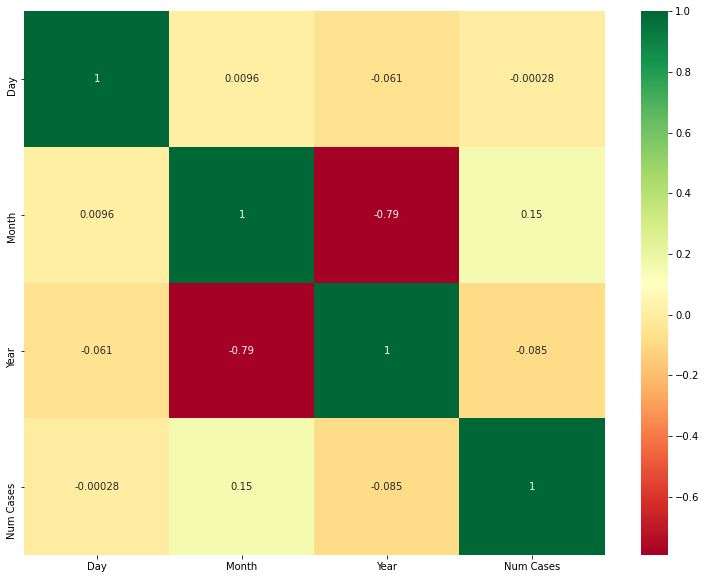

In [13]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [14]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['Detected State', 'Current Status'])

In [15]:
encoded_df.head()

,Day,Month,Year,Num Cases,Detected State_Andaman and Nicobar Islands,Detected State_Andhra Pradesh,Detected State_Bihar,Detected State_Chandigarh,Detected State_Chhattisgarh,Detected State_Delhi,...,Detected State_Telangana,Detected State_Uttar Pradesh,Detected State_Uttarakhand,Detected State_West Bengal,Current Status_Active,Current Status_Deceased,Current Status_Migrated,Current Status_Migrated_Other,Current Status_Migrated_other,Current Status_Recovered
0,1,1,2021,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,2021,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,2021,326,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,2021,350,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,1,1,2021,3,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [16]:
encoded_df.columns

Index(['Day', 'Month', 'Year', 'Num Cases',
       'Detected State_Andaman and Nicobar Islands',
       'Detected State_Andhra Pradesh', 'Detected State_Bihar',
       'Detected State_Chandigarh', 'Detected State_Chhattisgarh',
       'Detected State_Delhi', 'Detected State_Goa', 'Detected State_Gujarat',
       'Detected State_Haryana', 'Detected State_Jammu and Kashmir',
       'Detected State_Jharkhand', 'Detected State_Karnataka',
       'Detected State_Kerala', 'Detected State_Ladakh',
       'Detected State_Madhya Pradesh', 'Detected State_Maharashtra',
       'Detected State_Mizoram', 'Detected State_Odisha',
       'Detected State_Punjab', 'Detected State_Rajasthan',
       'Detected State_Tamil Nadu', 'Detected State_Telangana',
       'Detected State_Uttar Pradesh', 'Detected State_Uttarakhand',
       'Detected State_West Bengal', 'Current Status_Active',
       'Current Status_Deceased', 'Current Status_Migrated',
       'Current Status_Migrated_Other', 'Current Status_Migr

In [17]:
# Rearranging the columns
encoded_df = encoded_df[['Detected State_Kerala', 'Detected State_Delhi', 'Detected State_Telangana', 'Detected State_Rajasthan', 'Detected State_Haryana', 'Detected State_Uttar Pradesh', 'Detected State_Ladakh', 'Detected State_Tamil Nadu', 'Detected State_Jammu and Kashmir', 'Detected State_Karnataka', 'Detected State_Maharashtra', 'Detected State_Punjab', 'Detected State_Andhra Pradesh',
                         'Detected State_Uttarakhand', 'Detected State_Odisha', 'Detected State_West Bengal', 'Detected State_Chandigarh', 'Detected State_Chhattisgarh', 'Detected State_Gujarat', 'Detected State_Madhya Pradesh', 'Detected State_Bihar', 'Detected State_Mizoram', 'Detected State_Goa', 'Detected State_Andaman and Nicobar Islands', 'Detected State_Jharkhand',
                         'Current Status_Active', 'Current Status_Deceased', 'Current Status_Recovered', 'Day', 'Month', 'Year', 'Num Cases']]

In [18]:
encoded_df.head()

,Detected State_Kerala,Detected State_Delhi,Detected State_Telangana,Detected State_Rajasthan,Detected State_Haryana,Detected State_Uttar Pradesh,Detected State_Ladakh,Detected State_Tamil Nadu,Detected State_Jammu and Kashmir,Detected State_Karnataka,...,Detected State_Goa,Detected State_Andaman and Nicobar Islands,Detected State_Jharkhand,Current Status_Active,Current Status_Deceased,Current Status_Recovered,Day,Month,Year,Num Cases
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,2021,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,2021,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2021,326
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2021,350
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,2021,3


In [19]:
# Splitting the data into train and test set
X = encoded_df.drop(labels='Num Cases', axis=1)
y = encoded_df['Num Cases'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Linear Regression Model

In [21]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
# Predicting results
y_pred_lr = regressor.predict(X_train)

In [23]:
# Linear Regression - Model Evaluation
import statsmodels.api as sm
X1 = sm.add_constant(y_pred_lr)
result = sm.OLS(y_train,X1).fit()

print("---- Linear Regression - Model Evaluation ----")
print("R Square :", result.rsquared)
print("Adjusted R Square:", result.rsquared_adj)

---- Linear Regression - Model Evaluation ----
R Square : 0.3222804628176169
Adjusted R Square: 0.3222461826184675


In [24]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("R Squared Error (R2):{}".format(r2_score(y_train, y_pred_lr)))
print("Mean Absolute Error (MAE): {}".format(mae(y_train, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_train, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_train, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
R Squared Error (R2):0.3222804628176169
Mean Absolute Error (MAE): 1018.1737677586535
Mean Squared Error (MSE): 3664600.848943403
Root Mean Squared Error (RMSE): 1914.3147204530928


In [25]:
accuracy = regressor.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:32.228%


# Random Forest Regression Model

In [26]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
# Predicting results
y_pred_rfr = random_regressor.predict(X_train)

In [28]:
# Randon Forest Regression - Model Evaluation
import statsmodels.api as sm
X1 = sm.add_constant(y_pred_rfr)
result = sm.OLS(y_train,X1).fit()

print("---- Random Forest Regression - Model Evaluation ----")
print("R Square :", result.rsquared)
print("R Square Adjusted :", result.rsquared_adj)

---- Random Forest Regression - Model Evaluation ----
R Square : 0.9940728703219966
R Square Adjusted : 0.9940725705177641


In [29]:
# Randon Forest Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score, accuracy_score
print("---- Random Forest Regression - Model Evaluation ----")
print("R Squared Error (R2):{}".format(r2_score(y_train, y_pred_rfr)))
print("Mean Absolute Error (MAE): {}".format(mae(y_train, y_pred_rfr)))
print("Mean Squared Error (MSE): {}".format(mse(y_train, y_pred_rfr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_train, y_pred_rfr))))

---- Random Forest Regression - Model Evaluation ----
R Squared Error (R2):0.9939402166911324
Mean Absolute Error (MAE): 49.51084390383708
Mean Squared Error (MSE): 32766.78012030405
Root Mean Squared Error (RMSE): 181.0159664789381


In [30]:
accuracy = random_regressor.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:99.394%


# Polynomial Regression Model

In [31]:
### Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2)
X_train = polyFeat.fit_transform(X_train)

In [32]:
# --- Model Building ---
# Linear Regression Model
from sklearn import linear_model
poly_regressor = linear_model.LinearRegression()
poly_regressor.fit(X_train,y_train)

LinearRegression()

In [33]:
# Predicting results
y_pred_pnr = poly_regressor.predict(X_train)

In [34]:
# Polynomial Regression - Model Evaluation
import statsmodels.api as sm
X1 = sm.add_constant(y_pred_pnr)
result = sm.OLS(y_train,X1).fit()

print("---- Polynomial Regression - Model Evaluation ----")
print("R Square :", result.rsquared)
print("R Square Adjusted :", result.rsquared_adj)

---- Polynomial Regression - Model Evaluation ----
R Square : 0.5484503777761627
R Square Adjusted : 0.5484275376334098


In [35]:
# Polynomial Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score, accuracy_score
print("---- Polynomial Regression - Model Evaluation ----")
print("R Squared Error (R2):{}".format(r2_score(y_train, y_pred_pnr)))
print("Mean Absolute Error (MAE): {}".format(mae(y_train, y_pred_pnr)))
print("Mean Squared Error (MSE): {}".format(mse(y_train, y_pred_pnr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_train, y_pred_pnr))))

---- Polynomial Regression - Model Evaluation ----
R Squared Error (R2):0.5484503777761581
Mean Absolute Error (MAE): 771.9890707634538
Mean Squared Error (MSE): 2441642.9483812405
Root Mean Squared Error (RMSE): 1562.575741646222


In [36]:
accuracy = poly_regressor.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:54.845%


# PREDICTION FOR STATE

In [37]:
def predict(state_wise = 'Maharashtra', current_status = 'Active', day=1, month=7, year= 2021):
        temp_array = list()
        
        #state_wise
        if state_wise == 'Kerala':
            temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Delhi':
            temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Telangana':
            temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Rajasthan':
            temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Haryana':
            temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Uttar Pradesh':
            temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Ladakh':
            temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Tamil Nadu':
            temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Jammu and Kashmir':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Karnataka':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Maharashtra':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Punjab':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Andhra Pradesh':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Uttarakhand':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Odisha':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'West Bengal':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
        elif state_wise == 'Chandigarh':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
        elif state_wise == 'Chhattisgarh':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
        elif state_wise == 'Gujarat':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
        elif state_wise == 'Madhya Pradesh':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
        elif state_wise == 'Bihar':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
        elif state_wise == 'Mizoram':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
        elif state_wise == 'Goa':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
        elif state_wise == 'Andaman and Nicobar Islands':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
        elif state_wise == 'Jharkhand':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
          
            

        #current_status
        if current_status == 'Active':
            temp_array = temp_array + [1,0,0]
        elif current_status == 'Recovered':
            temp_array = temp_array + [0,1,0]
        elif current_status == 'Deceased':
            temp_array = temp_array + [0,0,1]
          
            
        # day, month, year
        temp_array = temp_array +[day, month, year]
        
        # Converting into numpy array
        data = np.array([temp_array])
        
        # Prediction for state
        return int(random_regressor.predict(data)[0])

In [38]:
state_prediction = predict(state_wise = 'Maharashtra', current_status = 'Active', day=1, month=7, year= 2021)
print("MY PREDICTION FOR CORONA_VIRUS :-")
print("The Final Predicted Upcoming Active CoronaVirus Cases: {} ".format(state_prediction))

MY PREDICTION FOR CORONA_VIRUS :-
The Final Predicted Upcoming Active CoronaVirus Cases: 40453 


In [39]:
state_prediction = predict(state_wise = 'Maharashtra', current_status = 'Recovered', day=1, month=7, year= 2021)
print("MY PREDICTION FOR CORONA_VIRUS :-")
print("The Final Predicted Upcoming Recovered CoronaVirus Cases: {} ".format(state_prediction))

MY PREDICTION FOR CORONA_VIRUS :-
The Final Predicted Upcoming Recovered CoronaVirus Cases: 180 


In [40]:
state_prediction = predict(state_wise = 'Maharashtra', current_status = 'Deceased', day=1, month=7, year= 2021)
print("MY PREDICTION FOR CORONA_VIRUS :-")
print("The Final Predicted Upcoming Deceased CoronaVirus Cases: {} ".format(state_prediction))

MY PREDICTION FOR CORONA_VIRUS :-
The Final Predicted Upcoming Deceased CoronaVirus Cases: 29664 
